## Install all packages
The package versions are tested on my local machine.

In [43]:
!pip install pandas==1.2.0
!pip install matplotlib==3.3.3
!pip install numpy==1.19.2

## Clone github (to access data)
Data available at `ds_cup/orig_data` as
- `train.csv`
- `valid.csv`
- `test.csv`

In [44]:
!git clone https://github.com/KushajveerSingh/ds_cup

fatal: destination path 'ds_cup' already exists and is not an empty directory.


## Imports (and junk)

In [45]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [46]:
path = Path('../data_orig')
# path = Path('ds_cup/orig_data')
train_df = pd.read_csv(path/'train.csv')
valid_df = pd.read_csv(path/'valid.csv')
test_df = pd.read_csv(path/'test.csv')

## Distribution of target values

In [47]:
def print_size(df, name):
    counts = df['Default_ind'].value_counts()
    print(f'{name} dataset')
    print(f'Num 0 values = {counts[0]}')
    print(f'Num 1 values = {counts[1]}')
    print()

In [48]:
print_size(train_df, 'train')
print_size(valid_df, 'valid')
print_size(test_df, 'test')

train dataset
Num 0 values = 18414
Num 1 values = 1586

valid dataset
Num 0 values = 2778
Num 1 values = 222

test dataset
Num 0 values = 4599
Num 1 values = 401



## Missing data
Check how many missing values are there in train, valid, test

In [49]:
train_df.isnull().sum()

tot_credit_debt                          0
avg_card_debt                            0
credit_age                               0
credit_good_age                          0
card_age                                 0
non_mtg_acc_past_due_12_months_num       0
non_mtg_acc_past_due_6_months_num        0
mortgages_past_due_6_months_num          0
credit_past_due_amount                   0
inq_12_month_num                         0
card_inq_24_month_num                    0
card_open_36_month_num                   0
auto_open_ 36_month_num                  0
uti_card                                 0
uti_50plus_pct                           0
uti_max_credit_line                      0
uti_card_50plus_pct                   2055
ind_acc_XYZ                              0
rep_income                            1570
States                                   0
Default_ind                              0
dtype: int64

In [50]:
valid_df.isnull().sum()

tot_credit_debt                         0
avg_card_debt                           0
credit_age                              0
credit_good_age                         0
card_age                                0
non_mtg_acc_past_due_12_months_num      0
non_mtg_acc_past_due_6_months_num       0
mortgages_past_due_6_months_num         0
credit_past_due_amount                  0
inq_12_month_num                        0
card_inq_24_month_num                   0
card_open_36_month_num                  0
auto_open_ 36_month_num                 0
uti_card                                0
uti_50plus_pct                          0
uti_max_credit_line                     0
uti_card_50plus_pct                   297
ind_acc_XYZ                             0
rep_income                            253
States                                  0
Default_ind                             0
dtype: int64

In [51]:
#test_df.isnull().sum() 

So only two columns contain missing data `uti_card_50plus_pct` and `rep_income`. Checking on these columns, for why the data is missing.
- `uti_card_50plus_pct`: Percentage of open credit cards with over 50% utilitzation.
    
    My understanding is the person does not have a credit card. Thus the missing value. To handle the missing value, I would add a new column of 0 (no missing value) and 1 (missing value) as it might be important information. For the missing value, I replace it with 0.

In [52]:
# Create new col and replace missing value with 0 in `uti_card_50plus_pct`
def handle_col_uti_card_50plus_pct(df):
    # Add new col
    df['uti_card_50plus_pct_missing'] = (df['uti_card_50plus_pct'].isnull()).astype(int)
    
    # Replace missing value with 0
    df['uti_card_50plus_pct'] = df['uti_card_50plus_pct'].fillna(0)
    return df

In [53]:
train_df = handle_col_uti_card_50plus_pct(train_df)
valid_df = handle_col_uti_card_50plus_pct(valid_df)
test_df  = handle_col_uti_card_50plus_pct(test_df)

- `rep_income`: annual income (self-reported by applicant and not verified)

    The reason for missing is obvious. I don't know what we should replace the missing value with. The reason a person may not report his annual income might be he is lazy or is it too low to get a loan. I will still add a column for a missing value 0 (no missing value) and 1 (missing value).
    
    I don't think filling it with 0 makes sense, so I use mean instead.
- Replaced Mean with Median because it works better for data not distributed normally. Check below graph. - Also, substitute median of that specific state, but all states have equal median wage?.

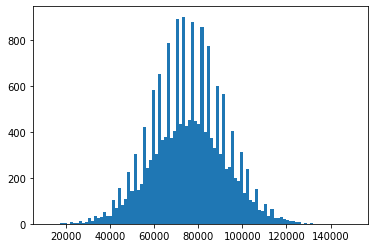

In [54]:
plt.hist(train_df['rep_income'],bins=100)
plt.show()

In [55]:
train_df

,tot_credit_debt,avg_card_debt,credit_age,credit_good_age,card_age,non_mtg_acc_past_due_12_months_num,non_mtg_acc_past_due_6_months_num,mortgages_past_due_6_months_num,credit_past_due_amount,inq_12_month_num,...,auto_open_ 36_month_num,uti_card,uti_50plus_pct,uti_max_credit_line,uti_card_50plus_pct,ind_acc_XYZ,rep_income,States,Default_ind,uti_card_50plus_pct_missing
0,80826.71,15872.99,300.0,114.0,292.0,0.0,0.0,0.0,0.00,3.0,...,0.0,0.365902,0.475594,0.410504,0.000000,0.0,69000.0,AL,0.0,1
1,96052.60,12178.02,281.0,102.0,232.0,0.0,0.0,0.0,0.00,2.0,...,0.0,0.542786,0.543158,0.535147,0.587351,0.0,61000.0,FL,0.0,0
2,75212.76,12052.24,261.0,149.0,260.0,0.0,0.0,0.0,0.00,1.0,...,1.0,0.323678,0.321776,0.348713,0.413293,0.0,NaN,AL,0.0,0
3,70727.84,8416.80,227.0,93.0,223.0,2.0,1.0,1.0,11013.96,0.0,...,0.0,0.448721,0.422809,0.491365,0.466810,0.0,79000.0,SC,1.0,0
4,41604.47,10611.97,249.0,136.0,241.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.644030,0.619987,0.546655,0.588442,1.0,NaN,LA,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,104765.01,13905.40,182.0,84.0,165.0,0.0,0.0,0.0,0.00,4.0,...,0.0,0.437699,0.557576,0.472592,0.481113,1.0,NaN,GA,0.0,0
19996,83990.07,10325.02,320.0,129.0,280.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.637746,0.484714,0.734825,0.000000,0.0,87000.0,NC,0.0,1
19997,107606.69,17838.79,290.0,168.0,271.0,1.0,0.0,0.0,0.00,3.0,...,1.0,0.486259,0.563475,0.406215,0.463120,0.0,63000.0,SC,0.0,0
19998,78787.72,11447.61,208.0,104.0,194.0,0.0,0.0,0.0,0.00,1.0,...,0.0,0.299035,0.283815,0.255758,0.281647,0.0,71000.0,AL,0.0,0


In [56]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
_DFTemp = train_df.copy()
_DFTemp['States'] = lb.fit_transform(_DFTemp['States'])
train_df[train_df.States == 'AL'][['rep_income']].median()

rep_income    75000.0
dtype: float64

In [57]:
mean_rep_income = train_df['rep_income'].median()

def handle_col_rep_income(df):
    # Add new col
    df['rep_income_missing'] = (df['rep_income'].isnull().astype(int))
    
    # Replace missing value with mean_rep_income
    df['rep_income'] = df['rep_income'].fillna(mean_rep_income)
    return df

In [58]:
train_df = handle_col_rep_income(train_df)
valid_df = handle_col_rep_income(valid_df)
test_df  = handle_col_rep_income(test_df)

Check one last time for missing values.

In [59]:
train_df.isnull().sum()

tot_credit_debt                       0
avg_card_debt                         0
credit_age                            0
credit_good_age                       0
card_age                              0
non_mtg_acc_past_due_12_months_num    0
non_mtg_acc_past_due_6_months_num     0
mortgages_past_due_6_months_num       0
credit_past_due_amount                0
inq_12_month_num                      0
card_inq_24_month_num                 0
card_open_36_month_num                0
auto_open_ 36_month_num               0
uti_card                              0
uti_50plus_pct                        0
uti_max_credit_line                   0
uti_card_50plus_pct                   0
ind_acc_XYZ                           0
rep_income                            0
States                                0
Default_ind                           0
uti_card_50plus_pct_missing           0
rep_income_missing                    0
dtype: int64

In [60]:
valid_df.isnull().sum()

tot_credit_debt                       0
avg_card_debt                         0
credit_age                            0
credit_good_age                       0
card_age                              0
non_mtg_acc_past_due_12_months_num    0
non_mtg_acc_past_due_6_months_num     0
mortgages_past_due_6_months_num       0
credit_past_due_amount                0
inq_12_month_num                      0
card_inq_24_month_num                 0
card_open_36_month_num                0
auto_open_ 36_month_num               0
uti_card                              0
uti_50plus_pct                        0
uti_max_credit_line                   0
uti_card_50plus_pct                   0
ind_acc_XYZ                           0
rep_income                            0
States                                0
Default_ind                           0
uti_card_50plus_pct_missing           0
rep_income_missing                    0
dtype: int64

In [61]:
#test_df.isnull().sum()

## Get important statistics
max, min, std and all things like that.

In [62]:
train_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
tot_credit_debt,20000.0,NaN,NaN,NaN,94563.702530,23546.443862,2367.430000,78743.750000,94670.630000,110329.335000,188890.960000
avg_card_debt,20000.0,NaN,NaN,NaN,14088.235475,9314.495936,2363.120000,11321.502500,13243.750000,15196.060000,99999.000000
credit_age,20000.0,NaN,NaN,NaN,296.697000,61.711702,54.000000,255.000000,297.000000,339.000000,545.000000
credit_good_age,20000.0,NaN,NaN,NaN,149.771750,34.016476,21.000000,127.000000,150.000000,172.000000,296.000000
card_age,20000.0,NaN,NaN,NaN,268.015200,59.364769,41.000000,227.000000,268.000000,308.000000,520.000000
non_mtg_acc_past_due_12_months_num,20000.0,NaN,NaN,NaN,0.111350,0.433890,0.000000,0.000000,0.000000,0.000000,4.000000
non_mtg_acc_past_due_6_months_num,20000.0,NaN,NaN,NaN,0.027400,0.171903,0.000000,0.000000,0.000000,0.000000,2.000000
mortgages_past_due_6_months_num,20000.0,NaN,NaN,NaN,0.030200,0.171142,0.000000,0.000000,0.000000,0.000000,1.000000
credit_past_due_amount,20000.0,NaN,NaN,NaN,329.287867,2073.899357,0.000000,0.000000,0.000000,0.000000,32662.980000
inq_12_month_num,20000.0,NaN,NaN,NaN,1.762700,1.740816,0.000000,0.000000,1.000000,3.000000,10.000000


So there is only one categorical column `States` with only 7 unique values. You can also count the missing columns we added as categorical but I don't know it that matters (as an integer column with value 0 and 1 can still represent a categorical value of 2 unique values).

In [63]:
valid_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tot_credit_debt,3000.0,89348.951453,20797.518015,13137.290000,75621.240000,88874.545000,103651.667500,170237.010000
avg_card_debt,3000.0,13530.926413,9078.847705,2910.570000,10883.795000,12755.865000,14601.647500,99999.000000
credit_age,3000.0,283.314667,62.777783,81.000000,241.000000,282.000000,325.000000,507.000000
credit_good_age,3000.0,147.482333,30.745484,24.000000,127.000000,147.000000,169.000000,253.000000
card_age,3000.0,253.234333,62.584314,76.000000,210.000000,251.000000,296.000000,479.000000
non_mtg_acc_past_due_12_months_num,3000.0,0.129000,0.480037,0.000000,0.000000,0.000000,0.000000,4.000000
non_mtg_acc_past_due_6_months_num,3000.0,0.032333,0.180644,0.000000,0.000000,0.000000,0.000000,2.000000
mortgages_past_due_6_months_num,3000.0,0.034667,0.182965,0.000000,0.000000,0.000000,0.000000,1.000000
credit_past_due_amount,3000.0,336.234333,1980.800293,0.000000,0.000000,0.000000,0.000000,20095.430000
inq_12_month_num,3000.0,0.831667,1.356937,0.000000,0.000000,0.000000,1.000000,8.000000


It is difficult to see the exact details from the above table. So visualizing the distribution using histogram is a better choice. Below the plots for a column in the train, valid, test are shown side by side. And if there is any distribution shift we can easily catch it.

In [74]:
def plot_dist(col_name):
    print(f'Column = {col_name}')
    fig, ax = plt.subplots(1,3, figsize=(15, 5))
    ax[0].hist(train_df[col],bins=20)
    ax[1].hist(valid_df[col],bins=20)
    ax[2].hist(test_df[col],bins=20)
    plt.show()

Column = tot_credit_debt


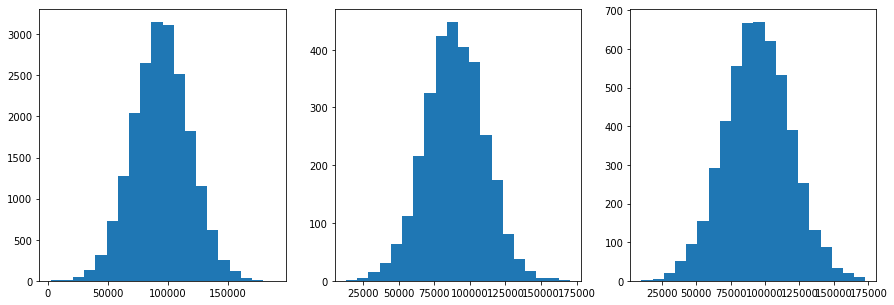

Column = avg_card_debt


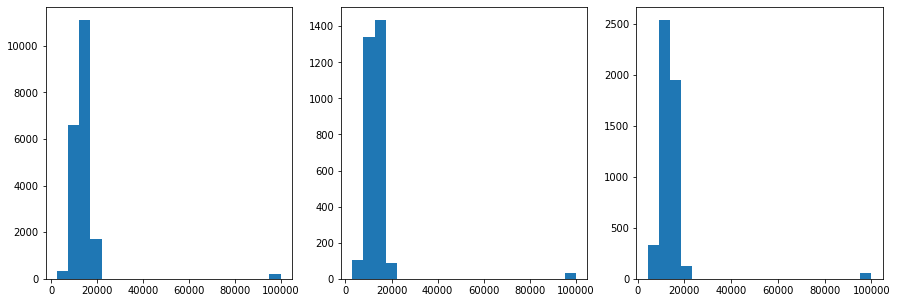

Column = credit_age


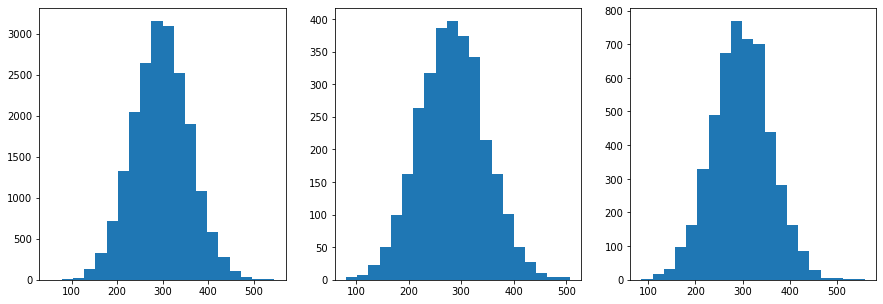

Column = credit_good_age


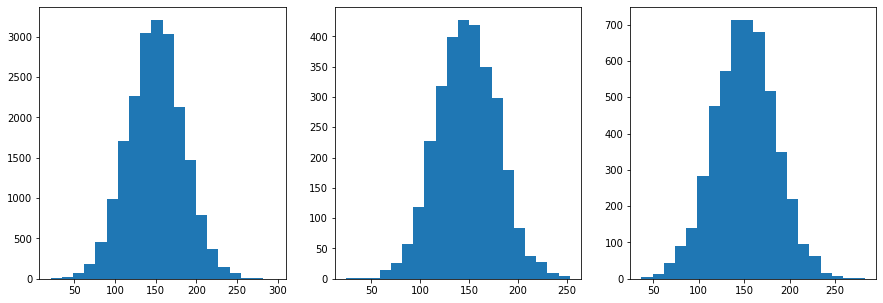

Column = card_age


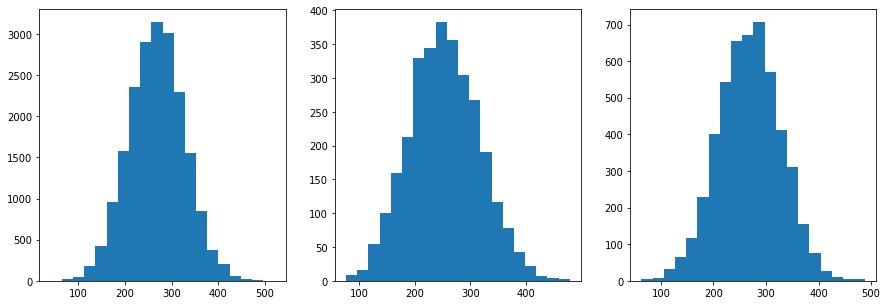

Column = non_mtg_acc_past_due_12_months_num


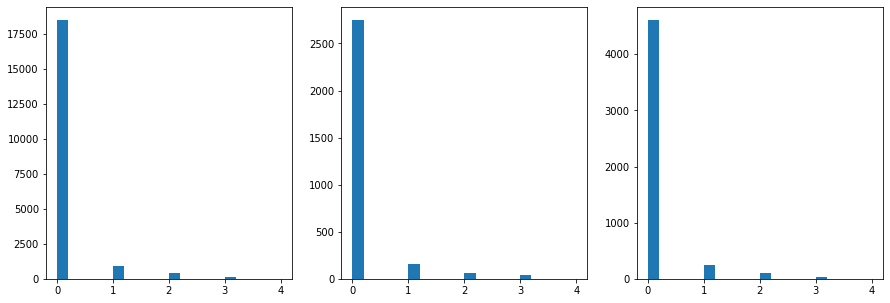

Column = non_mtg_acc_past_due_6_months_num


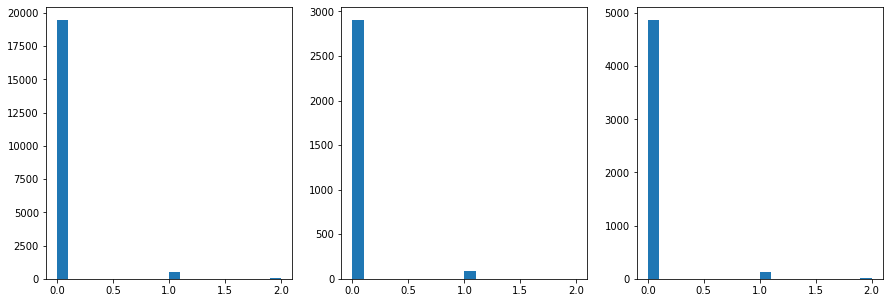

Column = mortgages_past_due_6_months_num


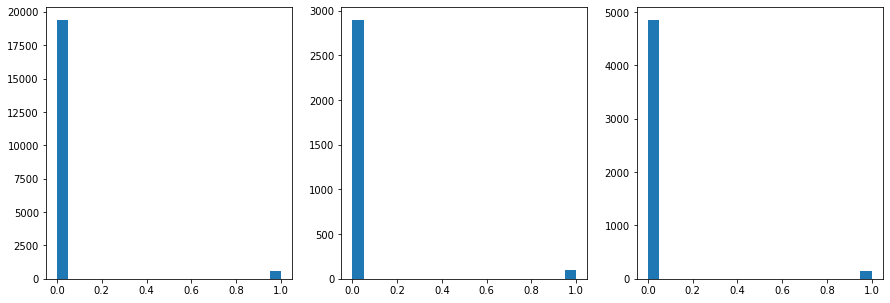

Column = credit_past_due_amount


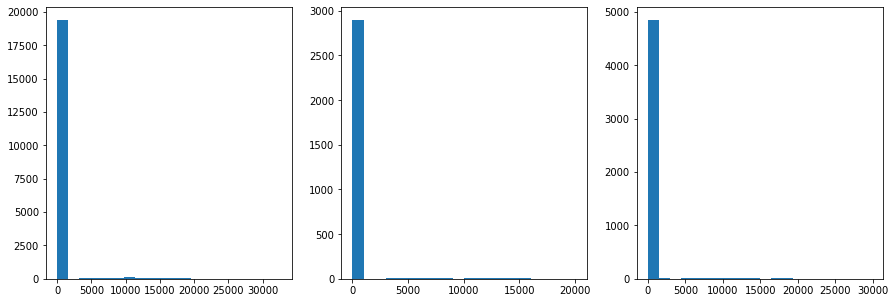

Column = inq_12_month_num


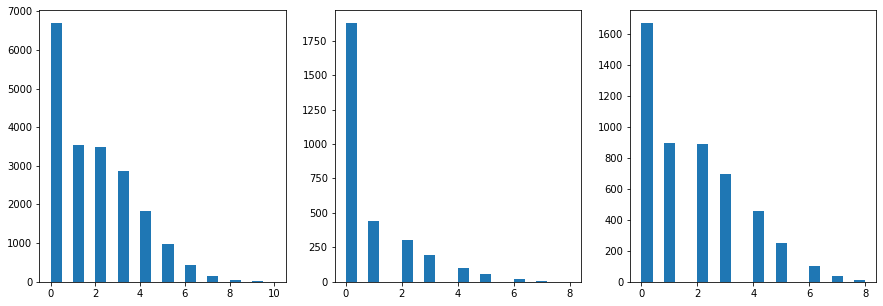

Column = card_inq_24_month_num


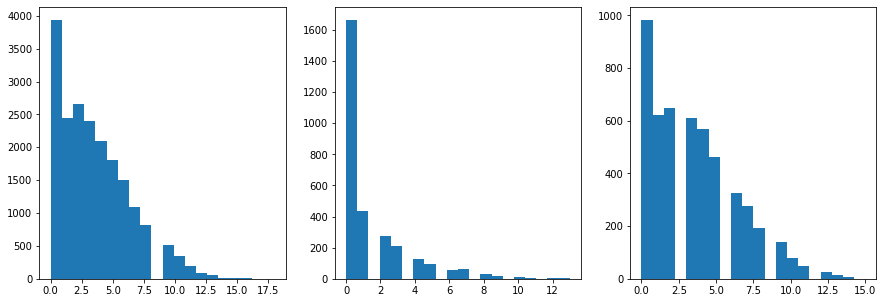

Column = card_open_36_month_num


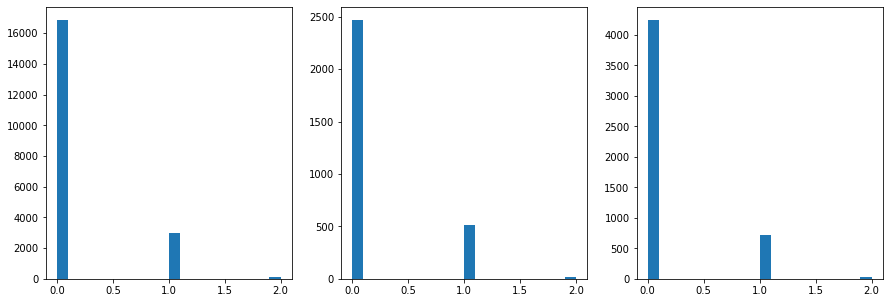

Column = auto_open_ 36_month_num


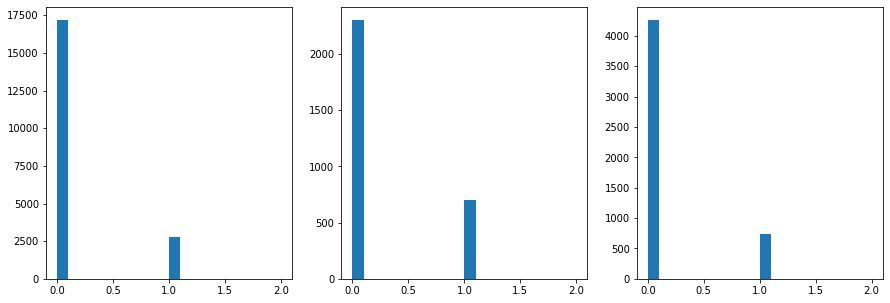

Column = uti_card


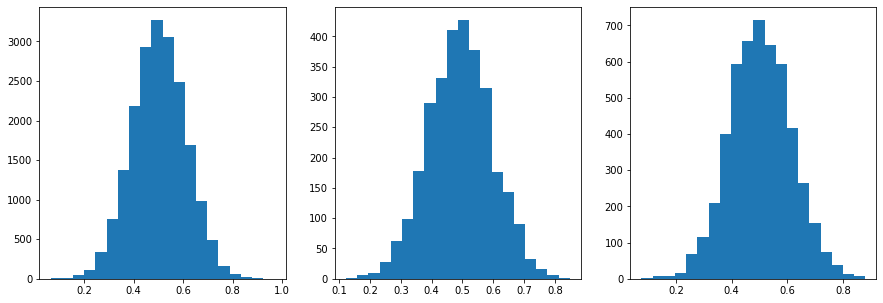

Column = uti_50plus_pct


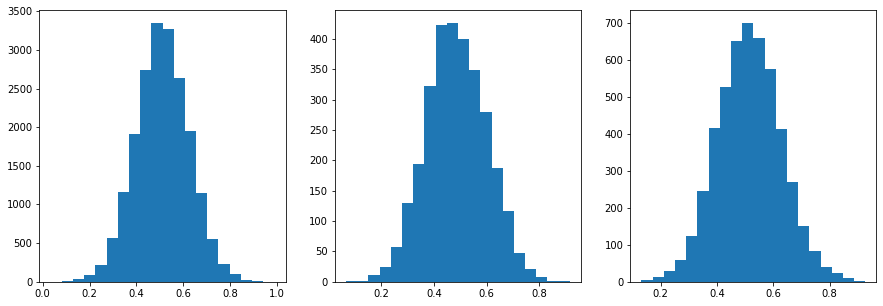

Column = uti_max_credit_line


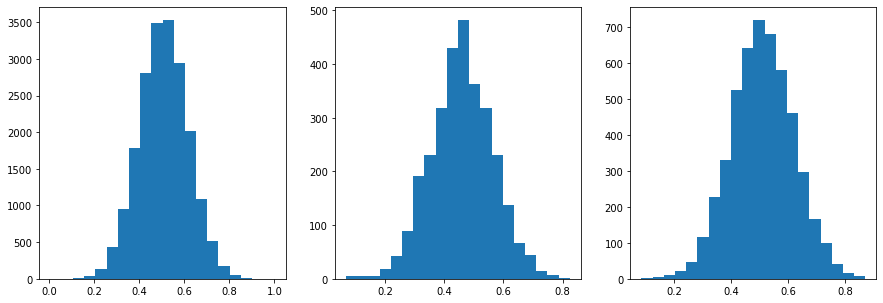

Column = uti_card_50plus_pct


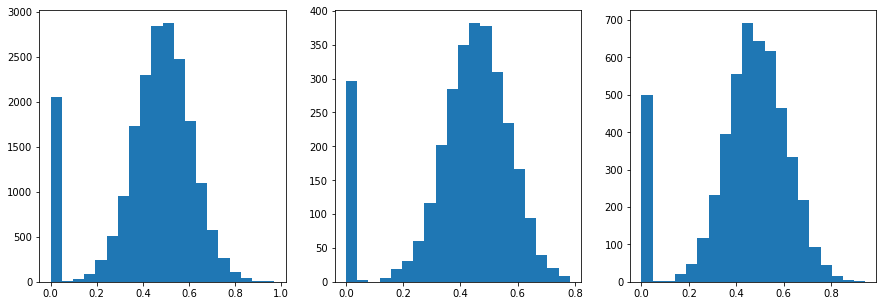

Column = ind_acc_XYZ


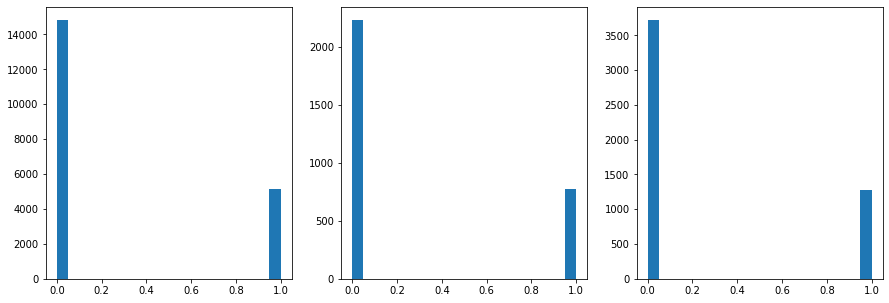

Column = rep_income


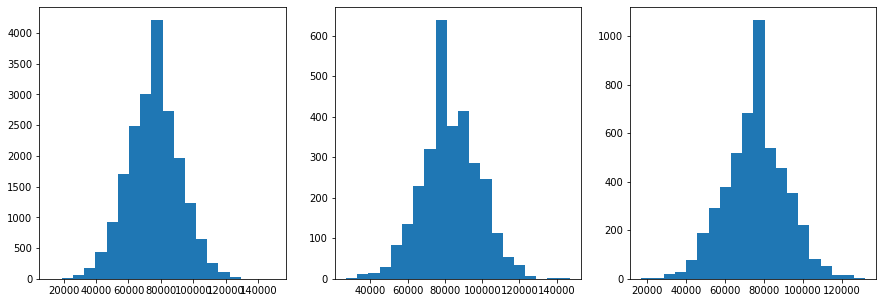

Column = States


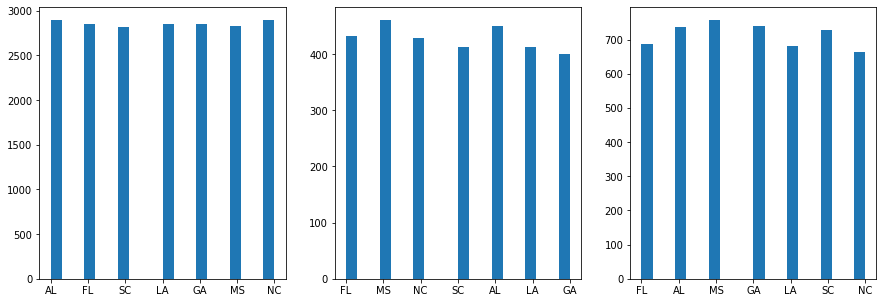

Column = Default_ind


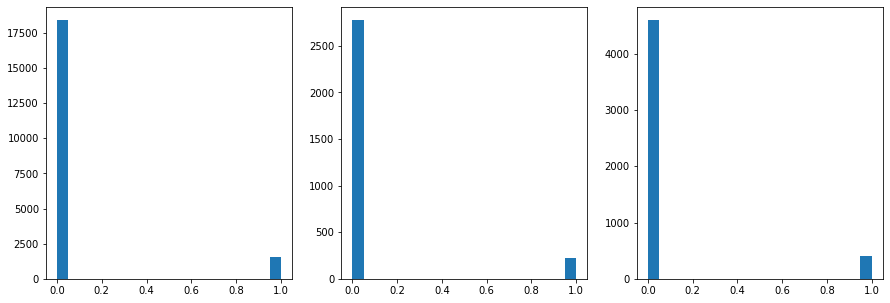

Column = uti_card_50plus_pct_missing


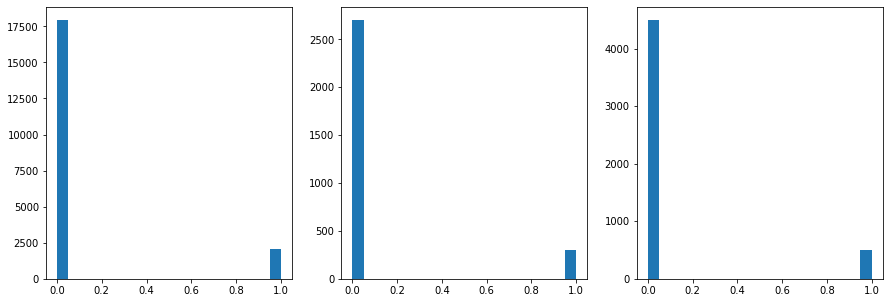

Column = rep_income_missing


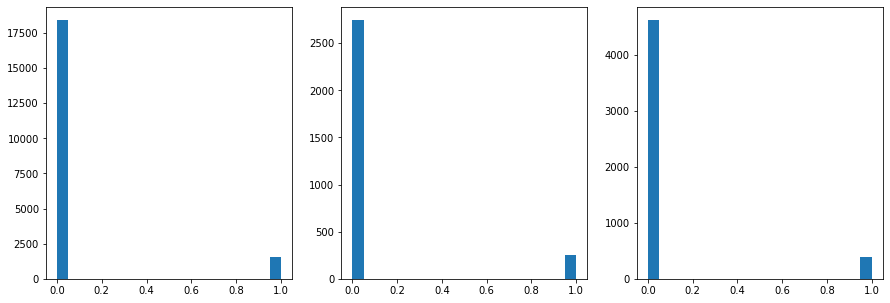

In [75]:
column_names = train_df.columns
for col in column_names:
    plot_dist(col)

The distribution are almost the same so we don't have to worry about distribution shift. And for the rest of the EDA we can ignore the test set as the validation set has the same distribution as test set.

## States column
This is the only categoircal column and it has same number of values for each category.

In [66]:
train_df['States'].value_counts()

NC    2898
AL    2893
FL    2857
GA    2857
LA    2849
MS    2827
SC    2819
Name: States, dtype: int64

## Correlation of columns
Saved the output as csv as it might be difficult to view in jupyter.

In [67]:
corr = train_df.corr()
corr.to_csv('corr.csv')

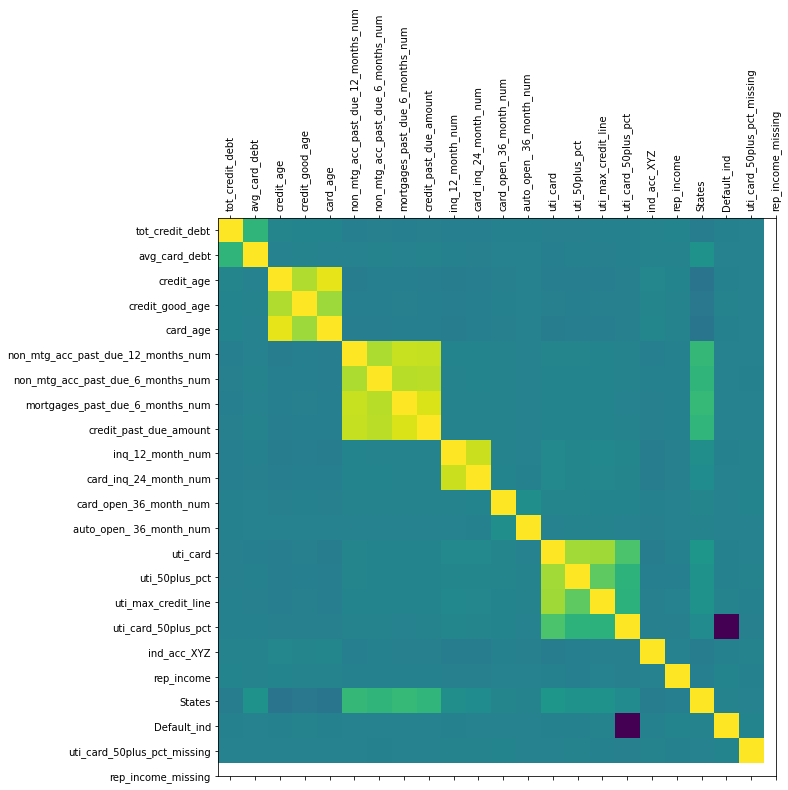

In [68]:
plt.figure(figsize=(10,10))
plt.matshow(corr, fignum=1)
plt.xticks(range(len(column_names)), labels=column_names, rotation='vertical')
plt.yticks(range(len(column_names)), labels=column_names)
plt.show()

## Check the distribution of cols with 'Default_ind'
The first plot is for values that have `Default_ind=0` and the second is for `Default_ind=1`. There are some outliers I think from looking at the plots for first time.

If we check column `non_mtg_acc_past_due_6_months_num`, we can directly predict if the person will default or not if the value of this column is between (1.00, 1.25).

Column = tot_credit_debt


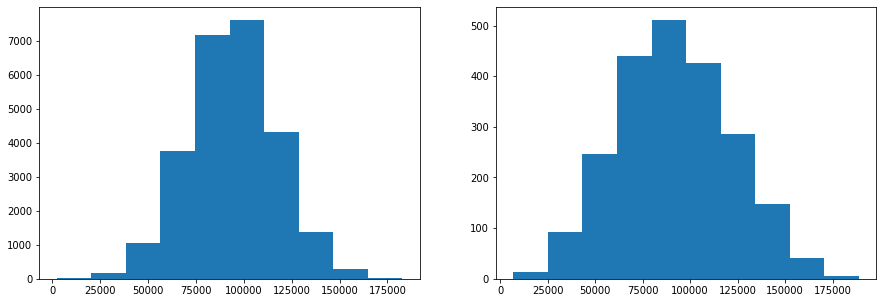

Column = avg_card_debt


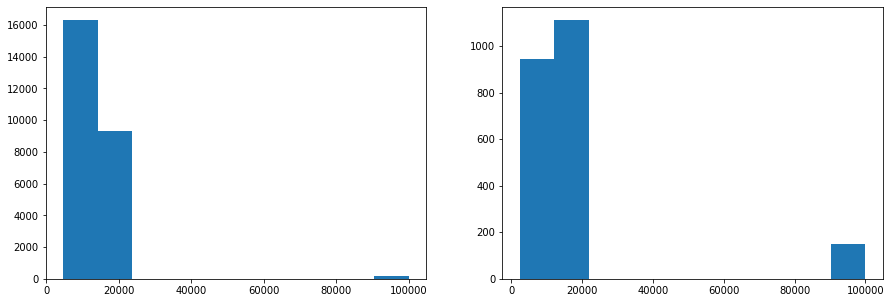

Column = credit_age


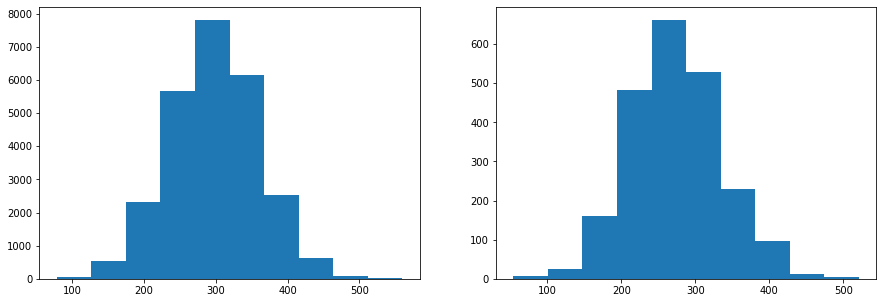

Column = credit_good_age


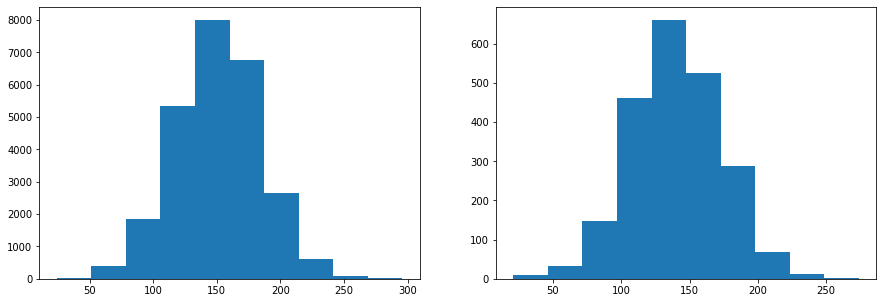

Column = card_age


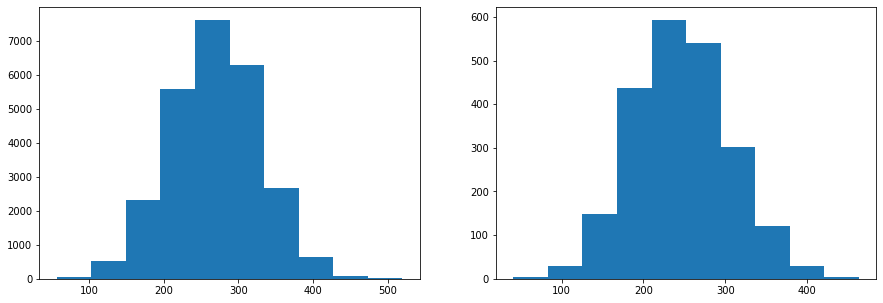

Column = non_mtg_acc_past_due_12_months_num


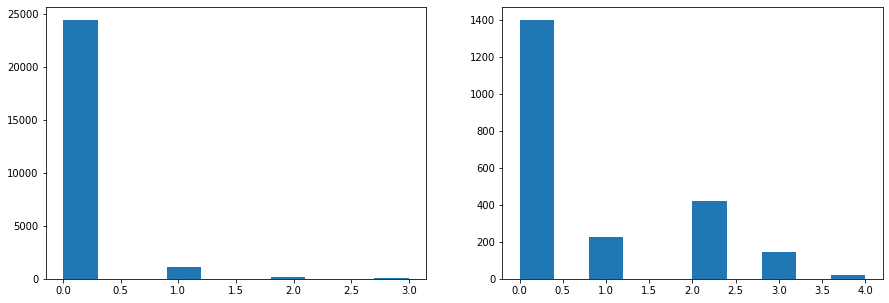

Column = non_mtg_acc_past_due_6_months_num


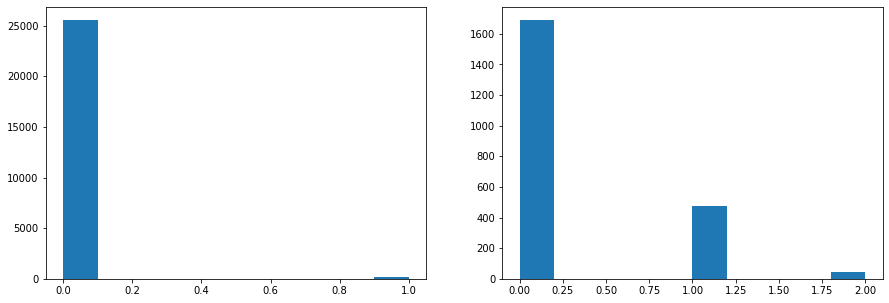

Column = mortgages_past_due_6_months_num


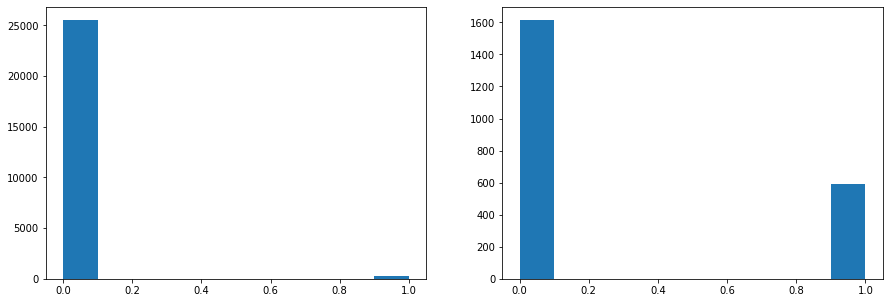

Column = credit_past_due_amount


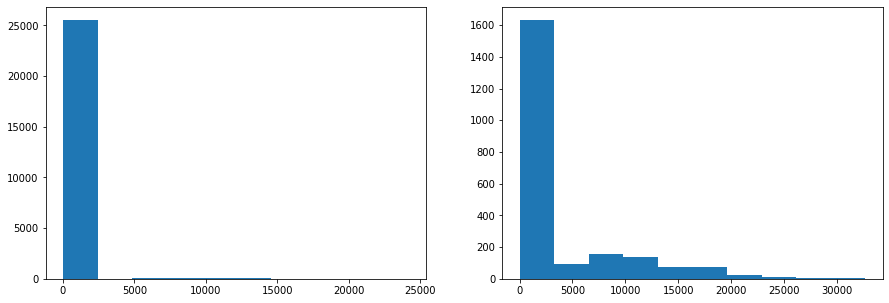

Column = inq_12_month_num


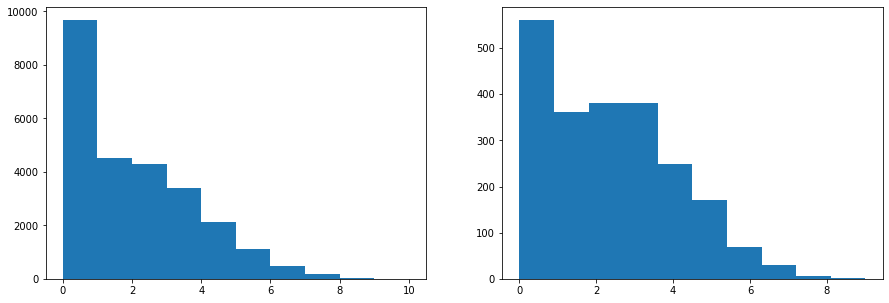

Column = card_inq_24_month_num


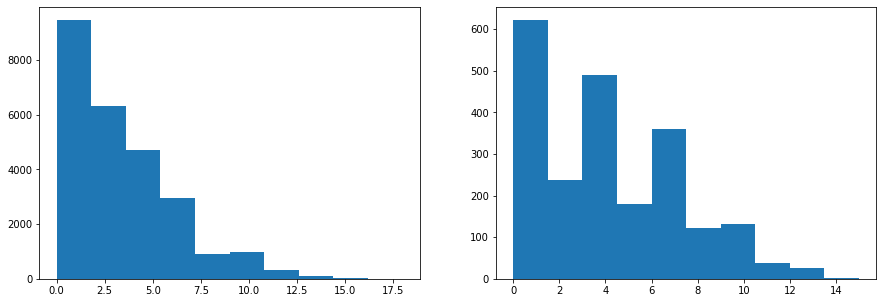

Column = card_open_36_month_num


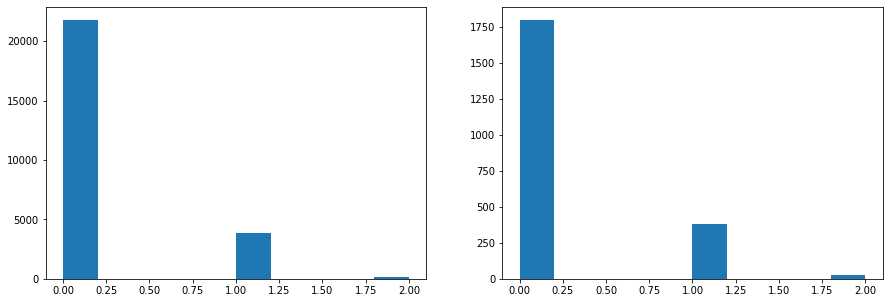

Column = auto_open_ 36_month_num


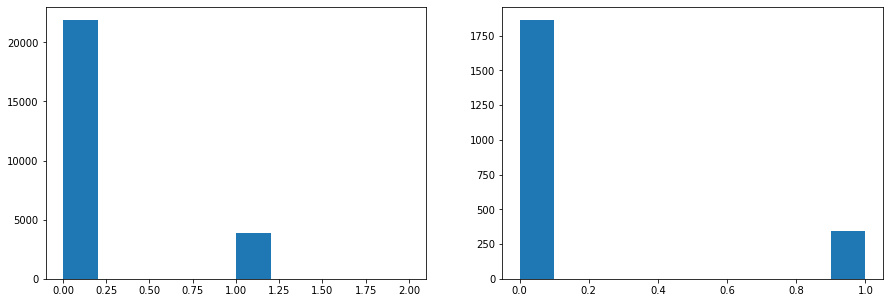

Column = uti_card


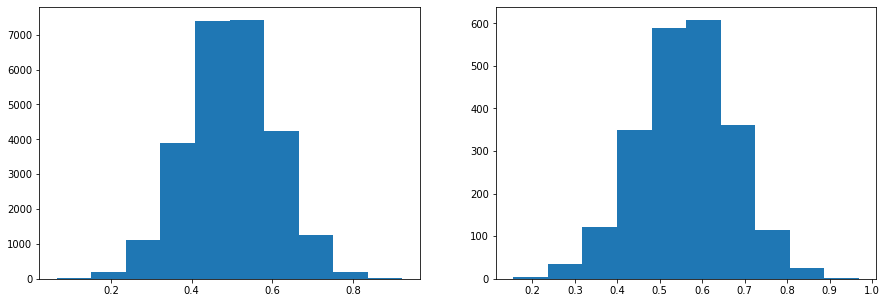

Column = uti_50plus_pct


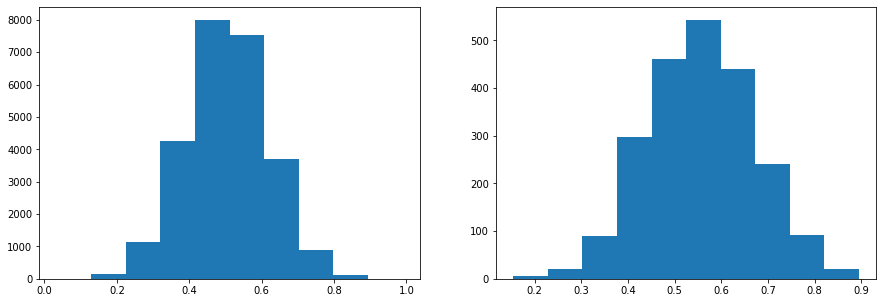

Column = uti_max_credit_line


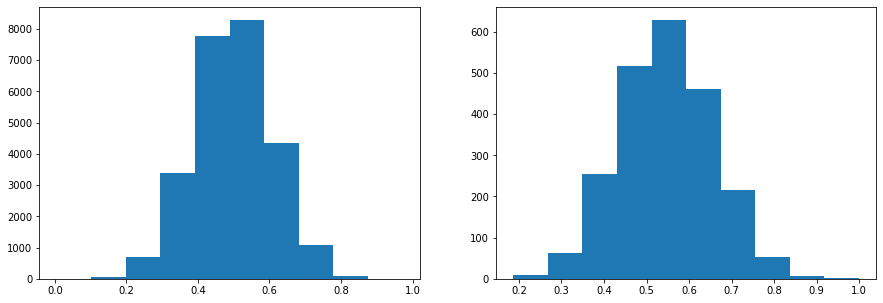

Column = uti_card_50plus_pct


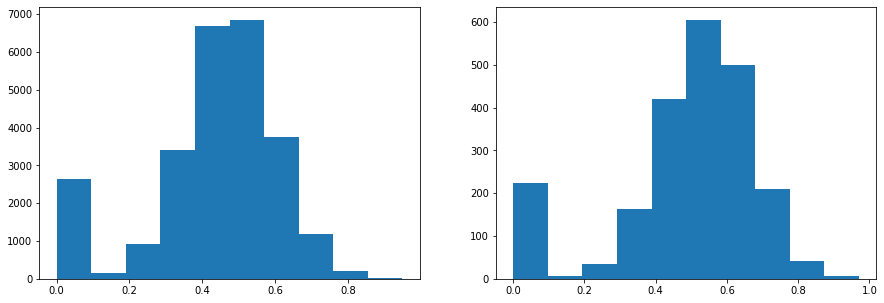

Column = ind_acc_XYZ


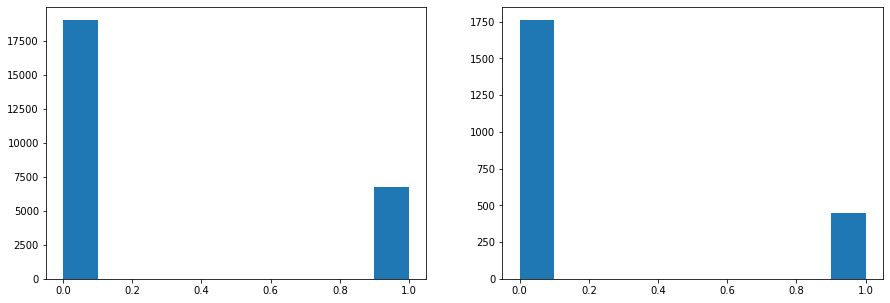

Column = rep_income


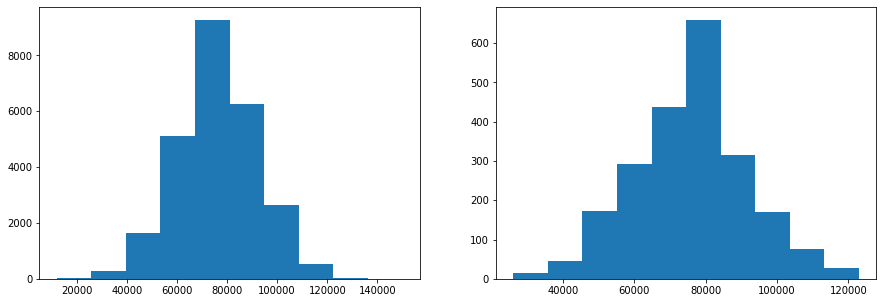

Column = States


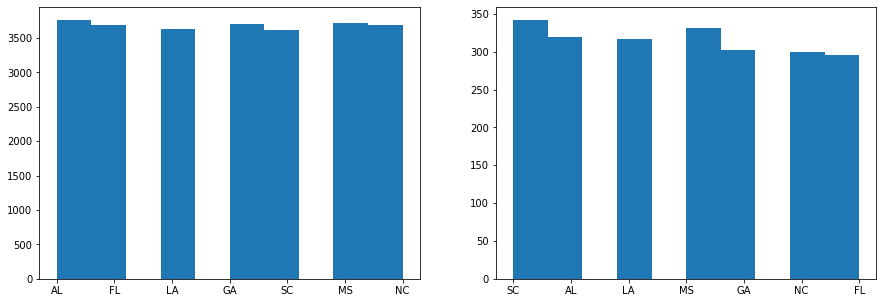

Column = Default_ind


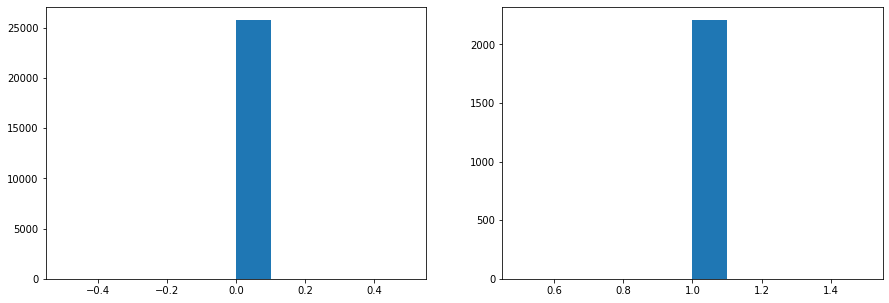

Column = uti_card_50plus_pct_missing


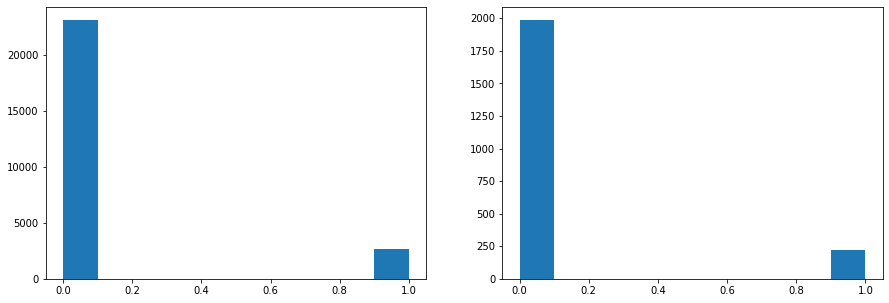

Column = rep_income_missing


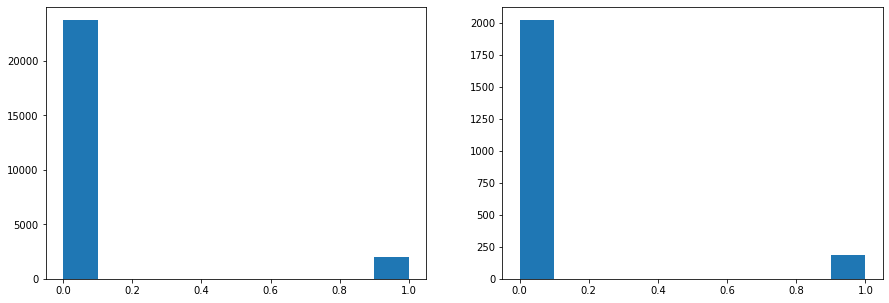

In [69]:
df = pd.concat([train_df, valid_df, test_df])
df_no = df.loc[df['Default_ind'] == 0.0]
df_yes = df.loc[df['Default_ind'] == 1.0]

def plot_dist(col_name):
    print(f'Column = {col_name}')
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    ax[0].hist(df_no[col])
    ax[1].hist(df_yes[col])
    plt.show()
    
columns = train_df.columns
for col in columns:
    plot_dist(col)